In [1]:
from asterism.models.lda import GibbsLDA, GibbsSLDA, PyroLDA
from asterism.models.ncp import split, NCP
from asterism.models.ntm import ATLAS, NTM, RSB
from asterism.models.vae import VQAE
from asterism.utils.data import make_dataset
from asterism.utils.plots import show_comparison

### Adaptable Topic Modeling of Latent Anatomical Structures

ATLAS: 100%|██████████| 1000/1000 [01:28<00:00, 11.32it/s]


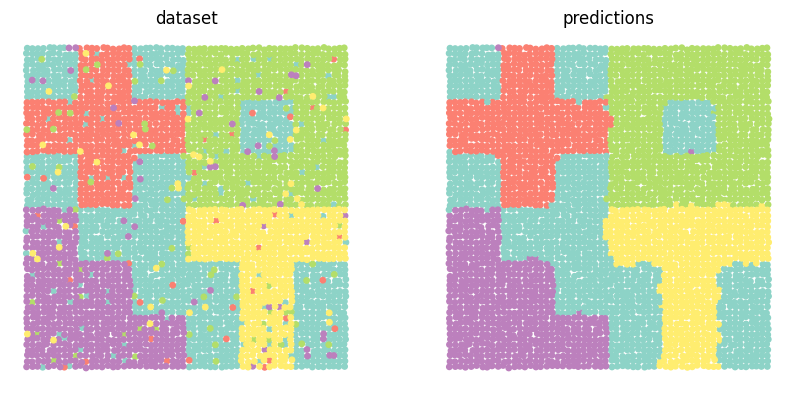

In [2]:
data, locs, labels = make_dataset(wiggle=.1, mix=.1, return_tensor=True)
topics = ATLAS().fit_predict(data, locs, y=labels)
show_comparison(locs, labels, topics)

### Latent Dirichlet Allocation using Collapsed Gibbs Sampling

LDA: 100%|██████████| 100/100 [02:08<00:00,  1.29s/it]


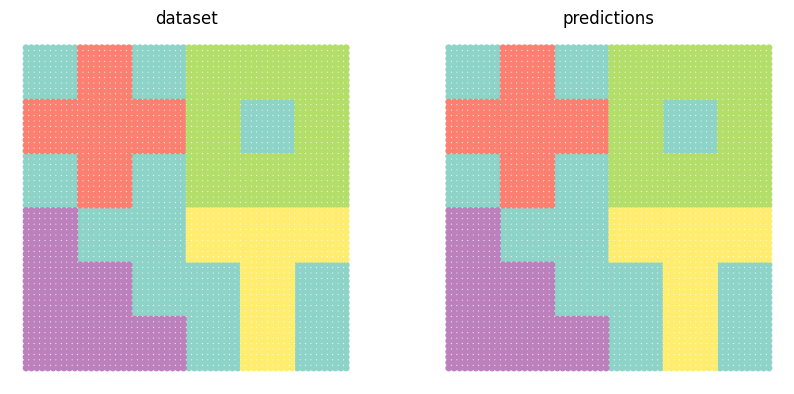

In [2]:
data, locs, labels = make_dataset()
topics = GibbsLDA(5).fit_predict(data, labels)
show_comparison(locs, labels, topics)

### Latent Dirichlet Allocation using Stochastic Variational Inference

LDA: 100%|██████████| 1000/1000 [00:02<00:00, 371.15it/s]


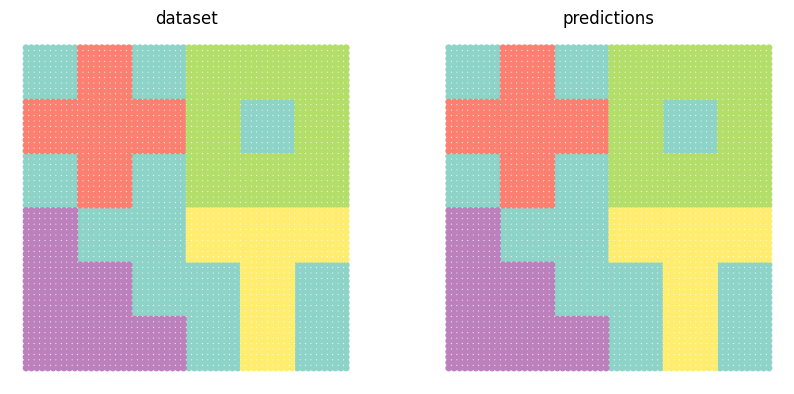

In [4]:
data, locs, labels = make_dataset(return_tensor=True)
topics = PyroLDA(5).fit_predict(data, y=labels)
show_comparison(locs, labels, topics)

### Spatial Latent Dirichlet Allocation using Collapsed Gibbs Sampling

SLDA: 100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


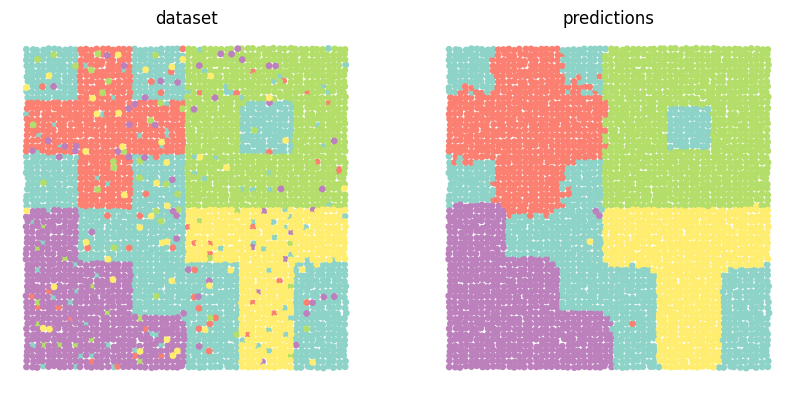

In [4]:
data, locs, labels = make_dataset(wiggle=.1, mix=.1)
topics = GibbsSLDA(5).fit_predict(data, locs, labels)
show_comparison(locs, labels, topics)

### Gaussian Softmax Neural Topic Model

NTM: 100%|██████████| 1000/1000 [00:18<00:00, 54.55it/s]


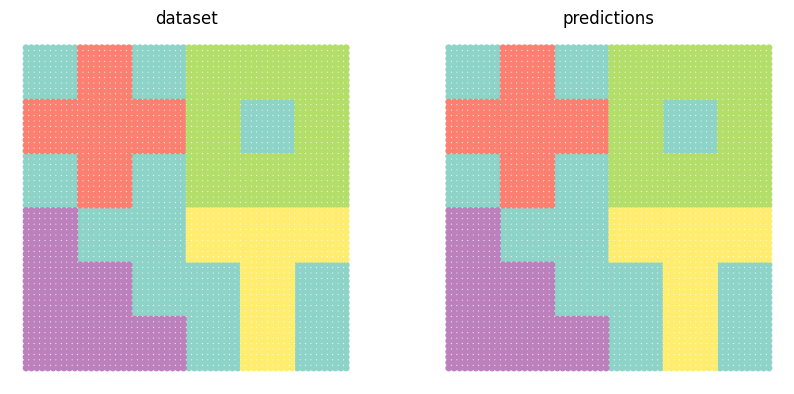

In [6]:
data, locs, labels = make_dataset(return_tensor=True)
topics = NTM(mode='softmax').fit_predict(data, y=labels)
show_comparison(locs, labels, topics)

### Gaussian Stick-Breaking Neural Topic Model

NTM: 100%|██████████| 1000/1000 [00:23<00:00, 41.74it/s]


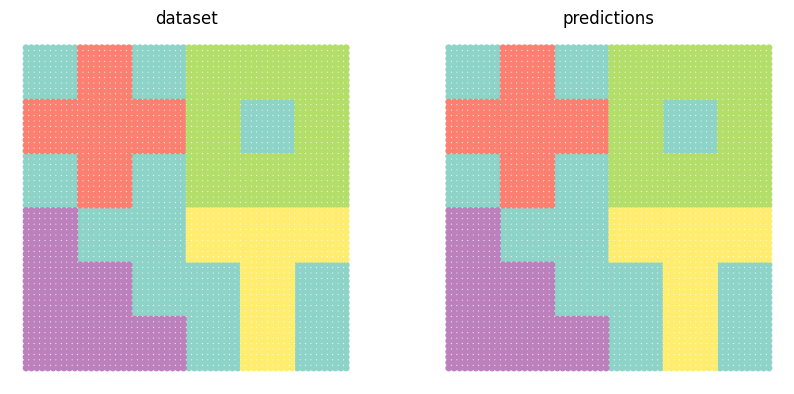

In [7]:
data, locs, labels = make_dataset(return_tensor=True)
topics = NTM(mode='dirichlet').fit_predict(data, y=labels)
show_comparison(locs, labels, topics)

### Recurrent Stick-Breaking Neural Topic Model

RSB: 100%|██████████| 1000/1000 [01:21<00:00, 12.24it/s]


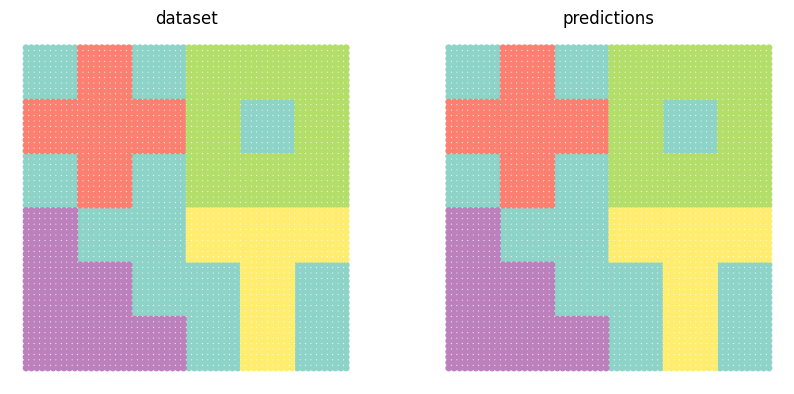

In [8]:
data, locs, labels = make_dataset(return_tensor=True)
topics = RSB().fit_predict(data, y=labels)
show_comparison(locs, labels, topics)

### Vector Quantized-Autoencoder

VQAE: 100%|██████████| 100/100 [00:02<00:00, 47.93it/s]


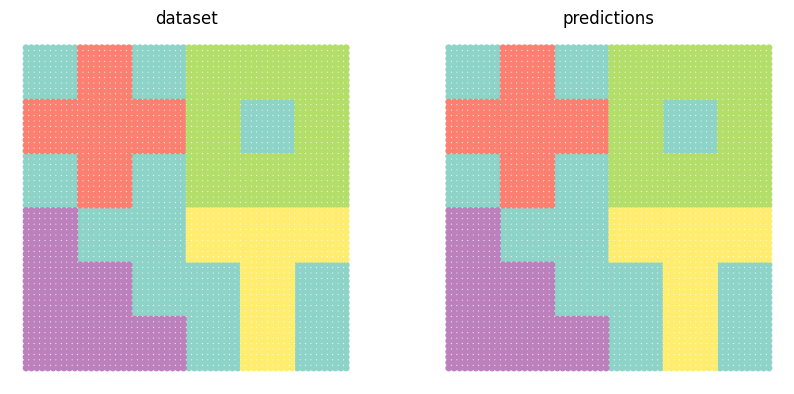

In [9]:
data, locs, labels = make_dataset(return_tensor=True)
topics = VQAE().fit_predict(data, y=labels)
show_comparison(locs, labels, topics)

### Neural Clustering Process

NCP: 100%|██████████| 200/200 [01:14<00:00,  2.70it/s]


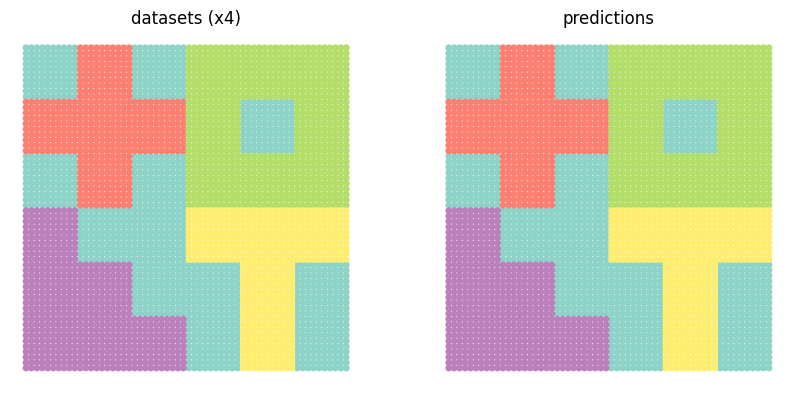

In [10]:
data, locs, labels = make_dataset(('polygons',)*5, return_tensor=True)
data_train, labels_train, data_test, _ = split(data, locs, labels)
topics = NCP().fit(data_train, y=labels_train)(data_test)
show_comparison(locs[:data_train.shape[1]], labels_train, topics, title1='datasets (x4)')